In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
import numpy as np
import importlib
from pyagn import sed
importlib.reload(sed)
from matplotlib import cm

In [2]:
bh = sed.SED(M = 1e8, mdot = 0.3)
distance = 1e26

In [3]:
warm_flux = bh.warm_flux(distance)
corona_flux = bh.corona_flux(distance)

Text(0.5, 0, 'R [Rg]')

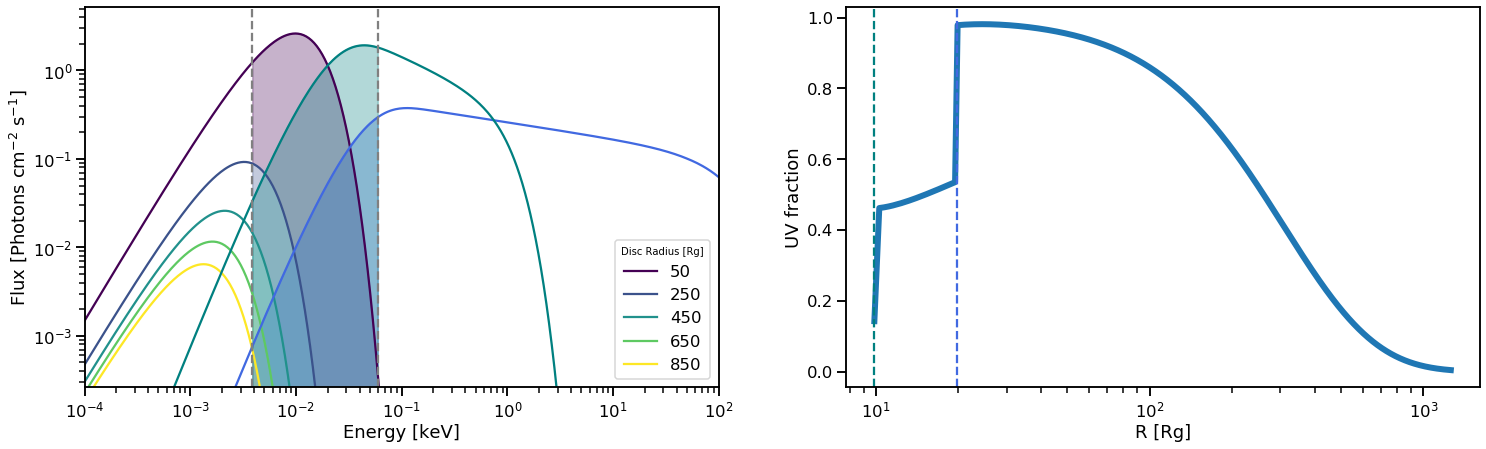

In [11]:
fig, ax = plt.subplots(1,2, figsize=(25,7))
distance = 1e26
r_range = [50, 250, 450, 650, 850]#np.geomspace(bh.warm_radius, bh.gravity_radius, 5)
dr = 20
colormap = cm.viridis(np.linspace(0,1,5))
disk_fluxes = []
for i, r in enumerate(r_range):
    disk_flux = np.pi * bh.disk_spectral_radiance_kev(bh.ENERGY_RANGE_KEV, r)
    disk_lumin = disk_flux * 4 * np.pi * bh.Rg**2 * dr #* ((r+dr/2.)**2 - (r-dr/2.)**2)
    disk_flux = disk_lumin / (4 * np.pi * distance**2 )
    ax[0].loglog(bh.ENERGY_RANGE_KEV, disk_flux, label = "%d"%r, color = colormap[i])
    #if i == 0:
    #    ax[0].fill_between(x = bh.ENERGY_RANGE_KEV, y1 =0 , y2 = disk_flux, color = 'grey', alpha = 0.15)
    ax[0].fill_between(x = bh.ENERGY_RANGE_KEV[bh.UV_MASK], y1 =0 , y2 = disk_flux[bh.UV_MASK], color = 'white')
    ax[0].fill_between(x = bh.ENERGY_RANGE_KEV[bh.UV_MASK], y1 =0 , y2 = disk_flux[bh.UV_MASK], color = colormap[i], alpha = 0.3)
    disk_fluxes.append(disk_flux)
    
ax[0].loglog(bh.ENERGY_RANGE_KEV, corona_flux, color = 'royalblue')
ax[0].fill_between(x = bh.ENERGY_RANGE_KEV[bh.UV_MASK], y1 = 0 , y2 = corona_flux[bh.UV_MASK], color = 'royalblue', alpha = 0.3)

ax[0].loglog(bh.ENERGY_RANGE_KEV, warm_flux, color = 'teal')
ax[0].fill_between(x = bh.ENERGY_RANGE_KEV[bh.UV_MASK], y1 = 0 , y2 = warm_flux[bh.UV_MASK], color = 'teal', alpha = 0.3)

ax[0].set_ylim(np.max(disk_fluxes) / 10000, np.max(disk_fluxes) * 2)
ax[0].set_xlim(1e-4,1e2)
ax[0].axvline(bh.ENERGY_UV_LOW_CUT_KEV, color = 'grey', linestyle = '--')
ax[0].axvline(bh.ENERGY_UV_HIGH_CUT_KEV, color = 'grey', linestyle = '--')
ax[0].legend(title = "Disc Radius [Rg]")
ax[0].set_xlabel("Energy [keV]")
ax[0].set_ylabel("Flux [Photons cm$^{-2}$ s$^{-1}$] ")

fractions_uv, _, _, component_fractions = bh.compute_uv_fractions(1e26, include_corona = True, return_all = True)
fraction_r_range = np.linspace(bh.corona_radius, bh.gravity_radius, len(fractions_uv) )
ax[1].semilogx(fraction_r_range, fractions_uv, linewidth = 6)
#ax[1].semilogx(fraction_r_range, component_fractions[:,0], label = 'corona')
#ax[1].semilogx(fraction_r_range, component_fractions[:,1], label = 'warm')
#ax[1].semilogx(fraction_r_range, component_fractions[:,2], label = 'disk')
ax[1].axvline(bh.corona_radius, color = 'teal', linestyle = "--")
ax[1].axvline(bh.warm_radius, color = 'royalblue', linestyle = "--")
ax[1].set_ylabel("UV fraction")
ax[1].set_xlabel("R [Rg]")

In [6]:
component_fractions[0]

[0.09287965185623792, 0.04981613368198801, 0]

In [7]:
component_fractions[1]

[0, 0.4620848314691215, 0]

In [9]:
asd = np.array(component_fractions)

In [12]:
asdasd = asd[:,0]

In [13]:
asdasd

array([0.09287965, 0.        , 0.        , ..., 0.        , 0.        ,
       0.        ])